In [1]:
# pacote de processamento dos dados
import pandas as pd
import numpy as np

# pacote de visualização de dados
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
arquivo2 = 'https://raw.githubusercontent.com/GabrielQuinteiro/TDE-3sem/main/producao-gas-combustivel-1000m3-2000-2023.xls'

# leitura do arquivo

df = pd.read_excel(arquivo2)

# imprime as 5 primeiras linhas

df.head(5)


,ANO,MÊS,UNIDADE DA FEDERAÇÃO,REFINARIA,PRODUTO,PRODUÇÃO
0,2000,JAN,AMAZONAS,REMAN,GAS COMBUSTIVEL,0.0
1,2000,FEV,AMAZONAS,REMAN,GAS COMBUSTIVEL,0.0
2,2000,MAR,AMAZONAS,REMAN,GAS COMBUSTIVEL,0.0
3,2000,ABR,AMAZONAS,REMAN,GAS COMBUSTIVEL,0.0
4,2000,MAI,AMAZONAS,REMAN,GAS COMBUSTIVEL,0.0


In [3]:
# imprime as 5 útilmas linhas 

df.tail(5)

,ANO,MÊS,UNIDADE DA FEDERAÇÃO,REFINARIA,PRODUTO,PRODUÇÃO
3858,2023,FEV,PARANÁ,REPAR,GAS COMBUSTIVEL,33589.743590
3859,2023,JAN,RIO GRANDE DO SUL,RIOGRANDENSE,GAS COMBUSTIVEL,1508.054000
3860,2023,FEV,RIO GRANDE DO SUL,RIOGRANDENSE,GAS COMBUSTIVEL,1377.681000
3861,2023,JAN,RIO GRANDE DO SUL,REFAP,GAS COMBUSTIVEL,14136.774360
3862,2023,FEV,RIO GRANDE DO SUL,REFAP,GAS COMBUSTIVEL,2849.885897


In [4]:
# mostra a quantidade de valores nulos no dataset

print(df.isnull().sum())


ANO                     0
MÊS                     0
UNIDADE DA FEDERAÇÃO    0
REFINARIA               0
PRODUTO                 0
PRODUÇÃO                0
dtype: int64


In [5]:
# conta quantas linhas da coluna 'PRODUÇÃO' contém o valor 0.

(df['PRODUÇÃO'] == 0).sum()


937

In [6]:
# Imprime as informações gerais do arquivo:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ANO                   3863 non-null   int64  
 1   MÊS                   3863 non-null   object 
 2   UNIDADE DA FEDERAÇÃO  3863 non-null   object 
 3   REFINARIA             3863 non-null   object 
 4   PRODUTO               3863 non-null   object 
 5   PRODUÇÃO              3863 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 181.2+ KB


In [7]:
# resumo estatistico da coluna 'PRODUÇÃO'

df['PRODUÇÃO'].describe()


count     3863.000000
mean     17259.596519
std      17957.512868
min          0.000000
25%         18.364423
50%      14650.004000
75%      27183.068000
max      99814.770000
Name: PRODUÇÃO, dtype: float64

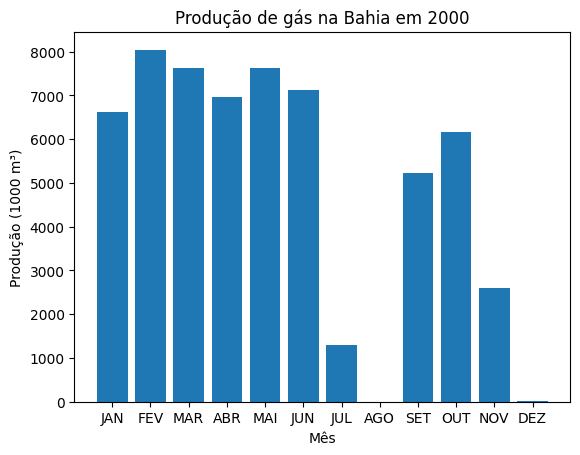

In [8]:
# Filtra os dados pela Bahia e pelo ano de 2000
df_bahia_2000 = df[(df['UNIDADE DA FEDERAÇÃO'] == 'BAHIA') & (df['ANO'] == 2000)]

# Plota o gráfico de barras
plt.bar(df_bahia_2000['MÊS'], df_bahia_2000['PRODUÇÃO'])
plt.xlabel('Mês')
plt.ylabel('Produção (1000 m³)')
plt.title('Produção de gás na Bahia em 2000')
plt.show()

O ano mais produtivo foi 2013 e o ano menos produtivo foi 2000.


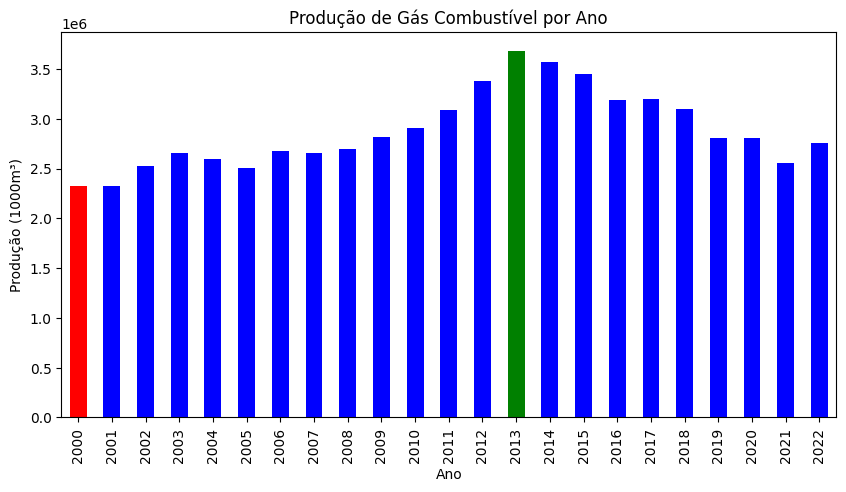

In [9]:
# remove o ano 2023
df_filtered = df[df['ANO'] < 2023]

# agrupa os dados por ano e soma as produções
producao_por_ano = df_filtered.groupby('ANO')['PRODUÇÃO'].sum()

# ordena o resultado do agrupamento pela coluna de produção em ordem decrescente e pega o primeiro valor, correspondente ao ano com maior produção.
ano_mais_produtivo = producao_por_ano.sort_values(ascending=False).index[0]

# ordena o resultado do agrupamento pela coluna de produção em ordem decrescente e pega o primeiro valor, correspondente ao ano com maior produção.
ano_menos_produtivo = producao_por_ano.sort_values(ascending=True).index[0]

print(f"O ano mais produtivo foi {ano_mais_produtivo} e o ano menos produtivo foi {ano_menos_produtivo}.")

# encontra o índice da maior e menor produção
idx_maior = producao_por_ano.argmax()
idx_menor = producao_por_ano.argmin()

# define as cores das barras
cores = ['r' if i == idx_menor else 'g' if i == idx_maior else 'b' for i in range(len(producao_por_ano))]

# plota o gráfico de barras
producao_por_ano.plot(kind='bar', color=cores, figsize=(10,5))

# define os títulos do gráfico e dos eixos
plt.title('Produção de Gás Combustível por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção (1000m³)')

# exibe o gráfico
plt.show()
